In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get Data Scientists Jobs
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the column for plotting
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])
df_DS_UK['salary_year_avg'].sample(10)

489891    154000.0
514439    157500.0
307242     52500.0
406066     75000.0
112966    157500.0
293785    132500.0
181640     88128.0
727509    105300.0
771165    105300.0
601722     89100.0
Name: salary_year_avg, dtype: float64

<Axes: >

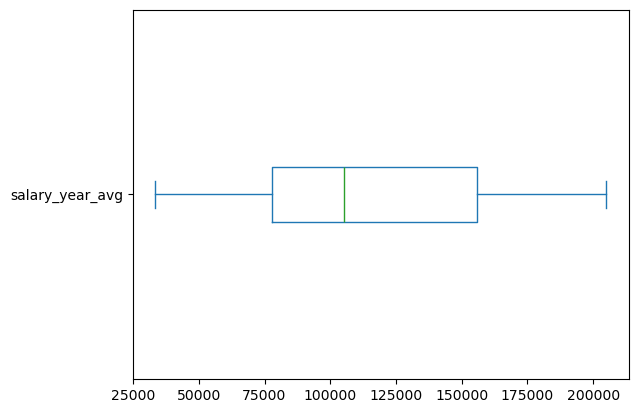

In [4]:
df_DS_UK['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x229864a6900>,
 'caps': [<matplotlib.lines.Line2D at 0x229864a54f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229864a6660>],
 'medians': [<matplotlib.lines.Line2D at 0x229864a7320>],
 'fliers': [<matplotlib.lines.Line2D at 0x229864a7620>],
 'means': []}

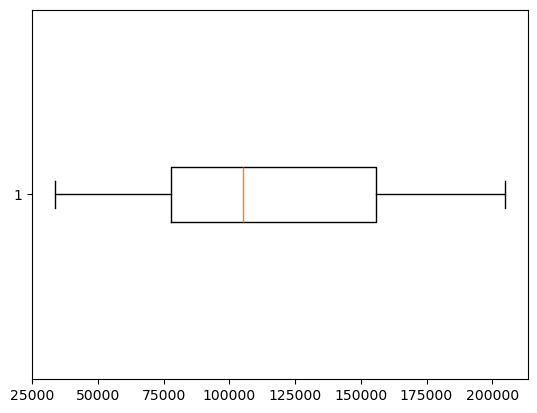

In [5]:
# Matplotlib Method

plt.boxplot(df_DS_UK['salary_year_avg'], vert=False)

# Using Boxplots to Compare Data (Analysts, Scientists, and Engineers) Salaries

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2886435246.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


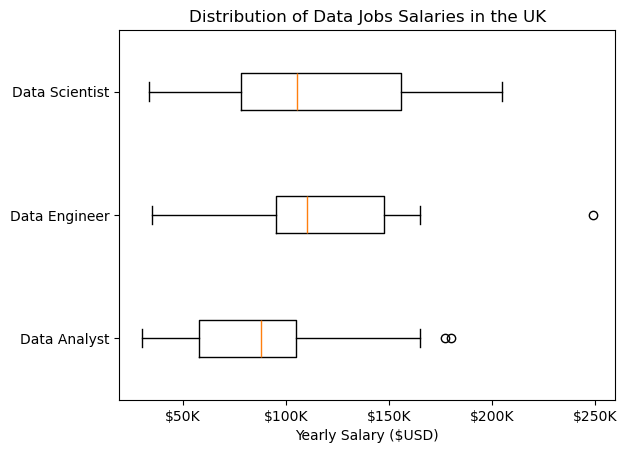

In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the Data to appropriate Job Titles
df_UK = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United Kingdom')].copy()

df_UK = df_UK.dropna(subset=['salary_year_avg'])

job_list = [df_UK[df_UK['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of Data Jobs Salaries in the UK')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

plt.show()

In [7]:
df_UK['salary_year_avg']

1107      157500.0
2602       51014.0
13764     109500.0
16526     100500.0
20017      60000.0
            ...   
779031     89100.0
781461     88128.0
783436     72900.0
783598     96773.0
783748     96773.0
Name: salary_year_avg, Length: 207, dtype: float64